In [6]:
import re
import pandas as pd

# Baca file teks hasil eksport
file_path = "chat.txt"  # Ubah dengan nama file Anda
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Regex untuk memisahkan tanggal, waktu, pengirim, dan pesan
pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}) (\d{1,2}\.\d{2}) - ([^:]+): (.+)"

# Parsing data
data = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        data.append({"Date": date, "Time": time, "Sender": sender, "Message": message})

# Buat DataFrame
df = pd.DataFrame(data)

# Simpan ke file CSV
csv_file = "chat_cleaned.csv"
df.to_csv(csv_file, index=False)
print(f"Data telah disimpan ke file: {csv_file}")


Data telah disimpan ke file: chat_cleaned.csv


Hasil clustering telah disimpan ke chat_clustered.csv


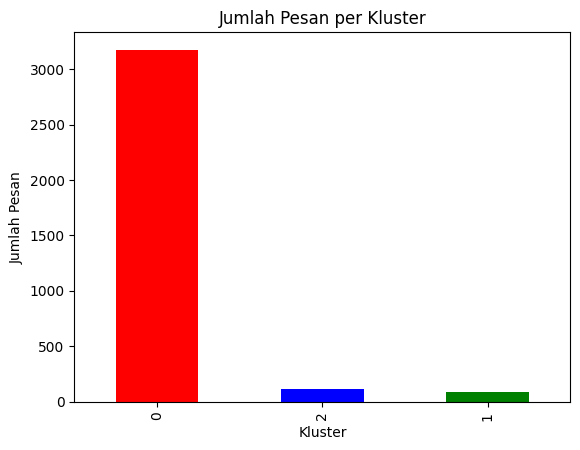

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data dari CSV
df = pd.read_csv("chat_cleaned.csv")

# Menggunakan kolom 'Message' untuk clustering
messages = df['Message'].fillna("")

# Konversi pesan menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(messages)

# Buat model K-Means dengan 3 kluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Simpan hasil clustering ke file baru
df.to_csv("chat_clustered.csv", index=False)
print("Hasil clustering telah disimpan ke chat_clustered.csv")

# Visualisasi jumlah pesan per kluster
df['Cluster'].value_counts().plot(kind="bar", color=['red', 'blue', 'green'])
plt.title("Jumlah Pesan per Kluster")
plt.xlabel("Kluster")
plt.ylabel("Jumlah Pesan")
plt.show()


In [8]:
from collections import Counter

# Mendapatkan 3 kata teratas untuk setiap kluster
for cluster_id in range(3):  # Ganti dengan jumlah kluster
    # Mengambil pesan-pesan dari kluster tertentu
    cluster_messages = df[df['Cluster'] == cluster_id]['Message']
    
    # Mengonversi pesan menjadi string dan mengganti NaN dengan string kosong
    cluster_messages = cluster_messages.fillna("").astype(str)
    
    # Menggabungkan semua pesan dalam kluster menjadi satu string dan memisahkannya menjadi kata-kata
    all_words = " ".join(cluster_messages).split()
    
    # Mendapatkan 3 kata teratas menggunakan Counter
    most_common_words = Counter(all_words).most_common(3)
    
    # Menampilkan hasil
    print(f"Kluster {cluster_id}: {most_common_words}")


Kluster 0: [('tidak', 370), ('<Media', 359), ('disertakan>', 359)]
Kluster 1: [('iku', 33), ('ameh', 25), ('e', 15)]
Kluster 2: [('ora', 84), ('Ora', 28), ('ono', 12)]


In [9]:
analysis_data = {
    "Kluster": [0, 1, 2],
    "Analisis": [
        "Berisi pesan yang banyak mengandung kata-kata terkait media yang tidak disertakan.",
        "berisi konjungsi dalam bahasa jawa seperti iku(itu), ameh(ingin), dan kata sambung 'e' yang tergantung konteks",
        "berisi kata tidak dan ada"
    ]
}

analysis_df = pd.DataFrame(analysis_data)
analysis_df.to_csv("hasil_analisis.csv", index=False)
